In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

from astropy.io import ascii

In [2]:
data = ascii.read("values_temp.dat")
speclam = data['speclam']
specflux = data['specflux']
log_F_lam_all = data['log_F_lam_all']
rayscat = data['rayscat']

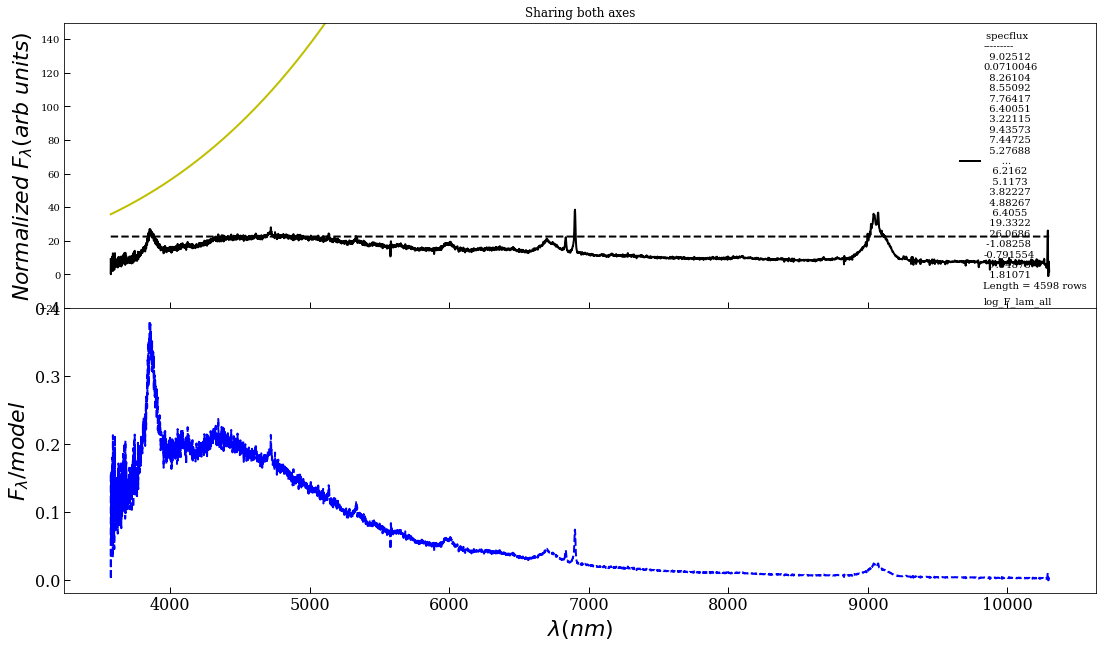

In [9]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(18.5, 10.5))

ax1.set_title('Sharing both axes')
ax1.set_ylim(-20,150.)

# plot the MODELS
ax1.plot(speclam, specflux,      color='black', ls='solid', linewidth=2, label=specflux)
ax1.plot(speclam, log_F_lam_all, color='black', ls='dashed', linewidth=2, label=log_F_lam_all)
ax1.plot(speclam, rayscat,       color='y', ls='solid', linewidth=2)

# plot the DATA
#ax1.plot(lam, sdss_1)
#ax1.plot(lam, sdss_2)
#ax1.plot(lam, palomar_b)
#ax1.plot(lam, palomar_r)

# add axes & label them
ax1.set_ylabel(r"$Normalized \ F_{\lambda} (arb \ units)$", fontsize=22)

#legend, title
ax1.legend(loc='upper right')
#plt.set_title(r"$Thermal \ Continuum; \ R_{alt}=%.1f \ r_{g}$" % (R_alt))

 
#USER: vertical lines for bandpass (optional)
#USER: choose 'y' to plot, set source redshift, min/max bandpass wavelength in nm
plot_bandpass='n'
redshift=0.378
band_min=380.0
band_max=750.0
 
#plot bandpass lines, if selected
if (plot_bandpass=='y'):
    #band_min_line=log10(band_min*1.0e-9/(1.0+redshift))
    #band_max_line=log10(band_max*1.0e-9/(1.0+redshift))
    band_min_line=(band_min/(1.0+redshift))
    band_max_line=(band_max/(1.0+redshift))
    ax1.axvline(x=band_min_line, color='k', linestyle='--')
    ax1.axvline(x=band_max_line, color='k', linestyle='--')

    
# Bottom panel plot 
ax2.plot(speclam, specflux/(log_F_lam_all+rayscat), color='blue', ls='dashed', linewidth=2)
#ax2.plot(speclam, specflux/rayscat, color='blue', ls='dashed', linewidth=2)

ax2.set_ylabel(r"$F_{\lambda} / model$" , fontsize=22)
ax2.set_xlabel(r"$\lambda (nm)$", fontsize=22)
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='minor', labelsize=8)

# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)


#output to files in appropriate formats
#USER: choose your filenames/formats
plt.savefig('mcd_gap_v3_temp.eps')
plt.savefig('mcd_gap_v3_temp.png')
plt.savefig('mcd_gap_v3_temp.pdf')
plt.show()
